In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('2Classdata.csv')
df.sample(5)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
282,53.683380,13.447022,41.584297,40.236358,113.913703,2.737035,Normal
19,41.729963,12.254074,30.122586,29.475889,116.585706,-1.244402,Abnormal
303,34.382299,2.062683,32.390820,32.319617,128.300199,-3.365516,Normal
71,86.900794,32.928168,47.794347,53.972627,135.075364,101.719092,Abnormal
54,41.171680,17.321206,33.469403,23.850474,116.377889,-9.569250,Abnormal


In [9]:
df['class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

In [10]:
df['class'] =df['class'].map({'Abnormal': 0,'Normal':1})

In [11]:
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


In [14]:
df['class'].value_counts()

0    210
1    100
Name: class, dtype: int64

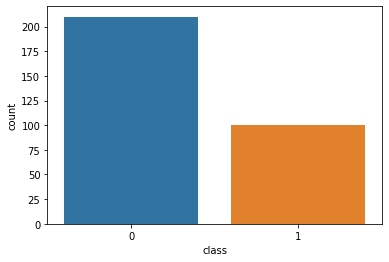

In [19]:
sns.countplot(df['class'])
plt.show()


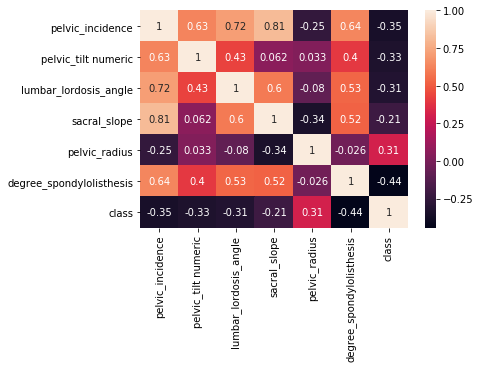

In [21]:
sns.heatmap(df.corr(),annot=True)
plt.show()

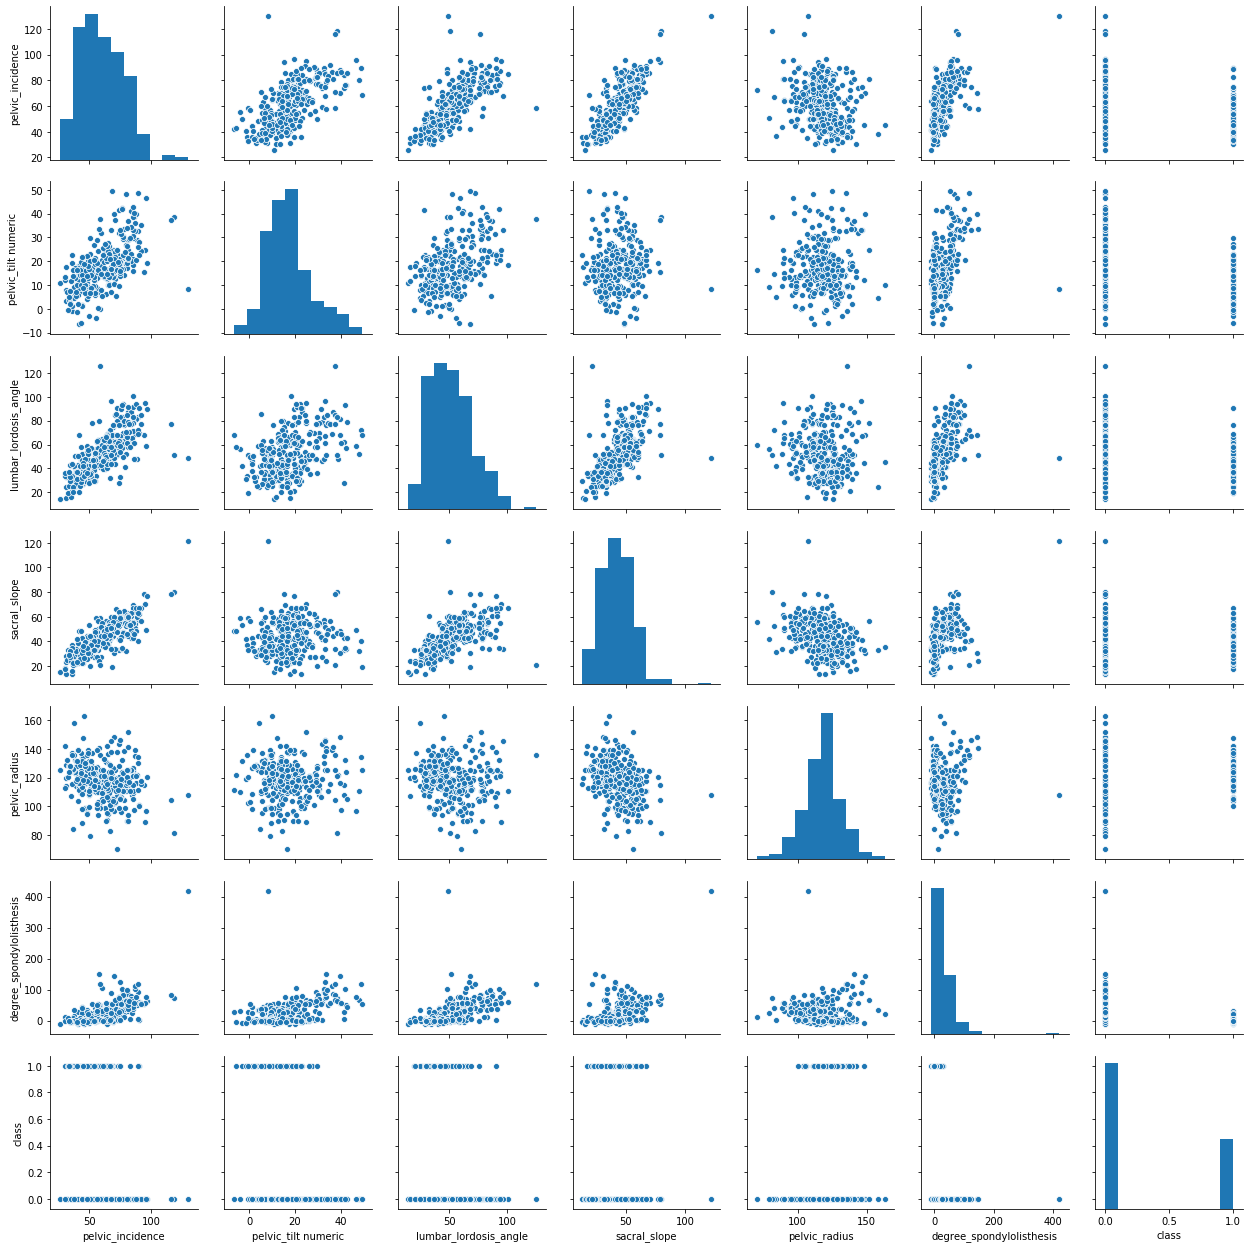

In [22]:
sns.pairplot(df)

In [23]:
x = df.drop(columns ='class')

In [42]:
from scipy.stats import zscore
x_standardize = x.apply(zscore)

In [26]:
from sklearn.cluster import KMeans

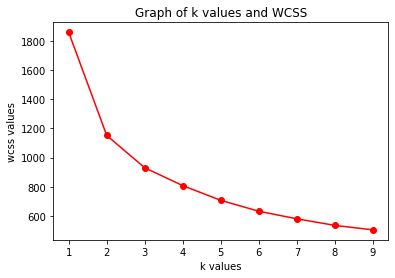

In [43]:
wcss = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x_standardize)
    wcss.append(kmeans.inertia_)
    
# Visualization of k values:

plt.plot(range(1,10), wcss, color='red',marker ='o')
plt.title('Graph of k values and WCSS')
plt.xlabel('k values')
plt.ylabel('wcss values')
plt.show()

In [44]:
pd.DataFrame(data =wcss,index =range(1,10)).reset_index()

,index,0
0,1,1860.000000
1,2,1151.890555
2,3,929.781924
3,4,807.196000
4,5,706.356788
5,6,631.519186
6,7,579.503259
7,8,534.516192
8,9,503.539125


In [45]:
km = KMeans(n_clusters=3).fit(x_standardize)

In [49]:
centroids =km.cluster_centers_
inertia =km.inertia_
labels =km.labels_

In [47]:
centroids

array([[ 1.31187719,  1.32807447,  1.24046155,  0.6943544 ,  0.23604498,
         1.36968645],
       [-0.86029434, -0.47642756, -0.80050004, -0.7494718 ,  0.3561728 ,
        -0.57064849],
       [ 0.36208169, -0.14482183,  0.32556842,  0.57292666, -0.59721278,
        -0.04657195]])

In [48]:
inertia

929.7095052073223

In [78]:
labels1 =pd.DataFrame(km.labels_ )
labels1.rename(columns ={0:'labels'},inplace =True)
labels1['labels'] =labels1['labels'].astype('category')
#df_labels['labels'] = df_labels['labels'].astype('category')

In [81]:
x_standardize.shape,labels1.shape

((310, 6), (310, 1))

In [83]:
x_standardize.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106


In [84]:
x_standardize= x_standardize.join(labels1)

In [86]:
x_standardize['labels'].value_counts()

1    140
2    108
0     62
Name: labels, dtype: int64

Text(0.5, 0.92, '3D plot of KMeans Clustering')

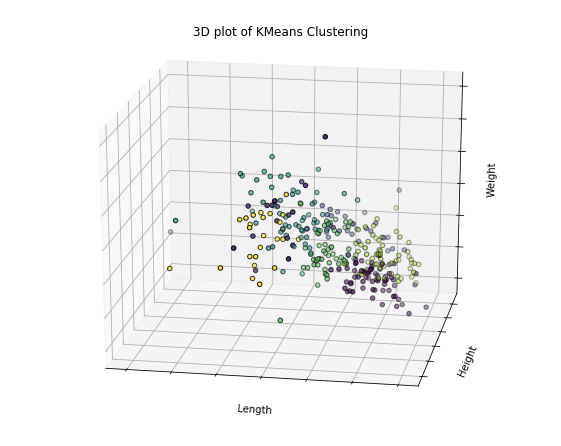

In [89]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=100)
kmeans.fit(x_standardize)
labels = kmeans.labels_
ax.scatter(x_standardize.iloc[:, 0], x_standardize.iloc[:, 1], x_standardize.iloc[:, 2],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')


## Agglomerative

### creating dendrogram using linkage

In [92]:
x_standardize.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,labels
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059,2
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556,1
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421,2
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288,2
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106,1


In [94]:
x_stand_hierarchy=x_standardize.drop(columns ='labels')

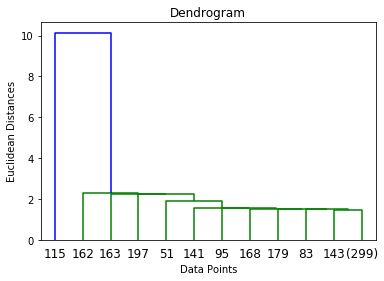

In [100]:
from scipy.cluster.hierarchy import linkage, dendrogram
z = linkage(x_stand_hierarchy, method='single')
dendrogram(z,truncate_mode='lastp',p =12)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

In [ ]:
#so, we can take 2 clusters as there are more staight  line in the cluster splitting

In [102]:
from sklearn.cluster import AgglomerativeClustering
agg =AgglomerativeClustering()

In [106]:
hierarchylabels =agg.fit_predict(x_stand_hierarchy)

In [107]:
hierarchylabels

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [117]:
hierarchylabelsdf =pd.DataFrame(hierarchylabels )
hierarchylabelsdf.rename(columns ={0:'hierarchylab'},inplace =True)
hierarchylabelsdf['hierarchylab'] =hierarchylabelsdf['hierarchylab'].astype('category')

In [129]:
x_standardize

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,kmeanslabel,hierarchylab
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059,2,0
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556,1,1
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421,2,0
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288,2,0
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106,1,1
...,...,...,...,...,...,...,...,...
305,-0.731786,-0.392921,-0.860010,-0.646718,-0.035469,-0.814491,1,1
306,-0.381197,0.318116,-1.225991,-0.726682,-0.267362,-0.712503,1,1
307,0.055201,0.515618,-0.310977,-0.313564,0.582893,-0.773488,1,1
308,-0.885823,-0.885660,-0.558613,-0.477128,0.047021,-0.695548,1,1


In [119]:
x_standardize= x_standardize.join(hierarchylabelsdf)

In [122]:
#x_standardize.drop(columns='labels1',inplace =True)

In [127]:
x_standardize.rename(columns ={'labels':'kmeanslabel'},inplace =True)

In [128]:
x_standardize['kmeanslabel'].value_counts()

1    140
2    108
0     62
Name: kmeanslabel, dtype: int64

In [130]:
x_standardize['hierarchylab'].value_counts()

0    173
1    137
Name: hierarchylab, dtype: int64

In [131]:
df['class'].value_counts()#original

0    210
1    100
Name: class, dtype: int64

In [ ]:
## now it is supervised learning , so do some supervised techincs and predict the models accuracy

In [133]:
y =x_standardize['kmeanslabel']
x = x_standardize.drop(columns =['kmeanslabel','hierarchylab'])

# Data Preparation( Splitting the Dependent/Target Variable and the Independent Variables )

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [142]:
from sklearn.preprocessing import StandardScaler
independent_scalar = StandardScaler()
x_train = independent_scalar.fit_transform (X_train) #fit and transform
x_validate = independent_scalar.transform (X_test) # only transform

In [143]:
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors =5).fit(x_train,y_train)

In [149]:
ytrainpredict = knn.predict(x_train)
ypredict = knn.predict(x_validate)

In [206]:
from sklearn.metrics import accuracy_score,classification_report
trainaccu =accuracy_score(y_train,ytrainpredict)
valaccu =accuracy_score(y_test,ypredict)

In [207]:
print('Classification Report')
print(classification_report(y_test,ypredict))

Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       0.97      0.97      0.97        36
           2       0.97      0.95      0.96        37

    accuracy                           0.97        93
   macro avg       0.97      0.97      0.97        93
weighted avg       0.97      0.97      0.97        93



In [151]:
trainaccu,valaccu

(0.967741935483871, 0.967741935483871)

# Decision Tree

In [189]:
from sklearn.tree import DecisionTreeClassifier
Dt = DecisionTreeClassifier(max_depth=7,criterion='entropy')

In [190]:
Dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [191]:
ytrainpredictDt = Dt.predict(x_train)
ypredictDt = Dt.predict(x_validate)

In [192]:
from sklearn.metrics import accuracy_score
trainaccuDt =accuracy_score(y_train,ytrainpredictDt)
valaccuDt =accuracy_score(y_test,ypredictDt)

In [208]:
print('Classification Report')
print(classification_report(y_test,ypredictDt))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        20
           1       0.97      0.92      0.94        36
           2       0.86      0.97      0.91        37

    accuracy                           0.92        93
   macro avg       0.94      0.91      0.92        93
weighted avg       0.93      0.92      0.93        93



In [193]:
trainaccuDt,valaccuDt

(1.0, 0.9247311827956989)

## Random Forest

In [204]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier(max_depth=10,criterion='entropy')

In [205]:
rf.fit(x_train,y_train)
ytrainpredictrf = rf.predict(x_train)
ypredictrf = rf.predict(x_validate)
from sklearn.metrics import accuracy_score
trainaccurf =accuracy_score(y_train,ytrainpredictDt)
valaccurf =accuracy_score(y_test,ypredictDt)

trainaccurf,valaccurf

(1.0, 0.9247311827956989)

In [209]:
print('Classification Report')
print(classification_report(y_test,ypredictDt))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        20
           1       0.97      0.92      0.94        36
           2       0.86      0.97      0.91        37

    accuracy                           0.92        93
   macro avg       0.94      0.91      0.92        93
weighted avg       0.93      0.92      0.93        93

